# 1. 통계분석 (data: Carseats,csv)

Carseats.csv는 자동차 좌석에 대한 판매정보이다. 

In [1]:
import pandas as pd
import numpy as np

df_carseats = pd.read_csv("/content/drive/MyDrive/data/adp/Carseats.csv")

In [ ]:
df_carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
df_carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Urban 변수에 따른 Sales의 차이가 있는지 통계적으로 검증하고 결과를 해석하시오 (단 정규성을 만족했다고 가정)

먼저 시각화를 통해 Sales변수와 Urban 변수를 각각 탐색한다.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


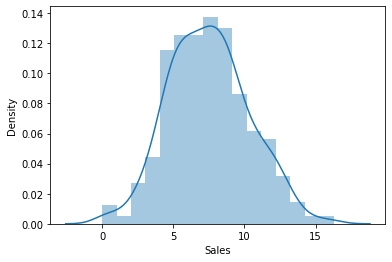

In [ ]:
sns.distplot(df_carseats['Sales'])
plt.show()

위 그래프에서 숫자형 변수인 Sales는 정규분포에 유사한 그래프를 만족하고 있다. 해당 그래프에서 주어진 조건에 맞에 Sales가 정규성을 만족하고 있음을 다시 한 번 확인할 수 있다. 

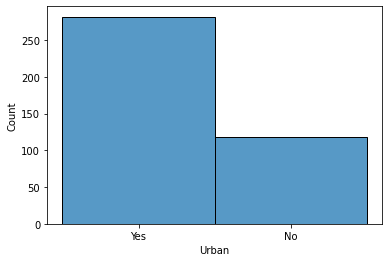

In [ ]:
sns.histplot(df_carseats['Urban'])
plt.show()

Urban 변수는 총 2가지 카테고리로 구성되어 있다. 
숫자형 변수에 대한 2개 카테고리 명목형 변수의 영향력을 확인할 때는 일반적으로 독립표본 t 검정을 사용한다. 다만 독립표본 t-test를 활용하기 위해서는 '독립성', '정규성'이 만족되어야 하는데, 주어진 데이터의 경우 정규성이 이미 만족되어 있으며 "도시인지의 여부"는 필연적으로 독립된 그룹이라 할 수 있을 것이다. 이에 등분산성 확인 방법인 levene's test를 통해 등분산성 존재 유무에 따라 독립표본 t 검정의 계산방법을 달리 해주면 된다.

In [ ]:
from scipy.stats import levene

In [ ]:
levene(df_carseats[df_carseats['Urban']=='Yes']['Sales'], df_carseats[df_carseats['Urban']=='No']['Sales'])

LeveneResult(statistic=2.9559854965252977e-06, pvalue=0.9986290607894824)

검정결과, 귀무가설 ; '두 그룹의 분산 차이가 0이다'에 대해여 p-value가 0.99로 귀무가설을 기각할 수 없으므로, 데이터에 등분산성이 존재한다고 말할 수 있다. 이에 Sales에 대한 Urban의 영향력을 확인하기 위해 등분산성이 존재하는 경우의 독립표본 t-test를 수행하였다.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(df_carseats[df_carseats['Urban']=='Yes']['Sales'], df_carseats[df_carseats['Urban']=='No']['Sales'])

Ttest_indResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775)

독립표본 t-test 결과 p값이 0.75으로 귀무가설 '두 그룹의 평균 차이가 0이다'를 기각할 수 없다. 따라서 Urban 변수에 따라 Sales에 차이가 존재하지 않는다고 말할 수 있다.

## Sales 변수와 CompPrice, Income, Advertising, Population, Price, Age, Education 변수들 간에 피어슨 상관계수를 이용한 상관관계 분석을 수행하고 이를 해석하시오.

Sales와 다른 수치형 변수들 간의 선형 관계를 파악하는 문제이다. 데이터 컬럼 중 숫자형 변수인 데이터들만 추출하여, Sales와의 산점도를 그리고, 피어슨 상관계수를 한 뒤 그 결과에 대해 해석하겠다.

이 문제에서 반드시 알아야할 것은 피어슨 상관분석을 사용하려면 상관관계를 확인하는 두 변수가 선형성을 가져야 하며 두 데이터는 각각 정규분포를 따라야 한다는 것이다. 만약 이러한 가정을 만족하지 않는다면 순위 척도를 이용해 상관성을 계산하는 스피어만 상관분석을 활용하는 것이 더 나은 선택이다.

In [3]:
cnames = list(df_carseats.select_dtypes(exclude=['object']).columns)
cnames = cnames[1:]
cnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

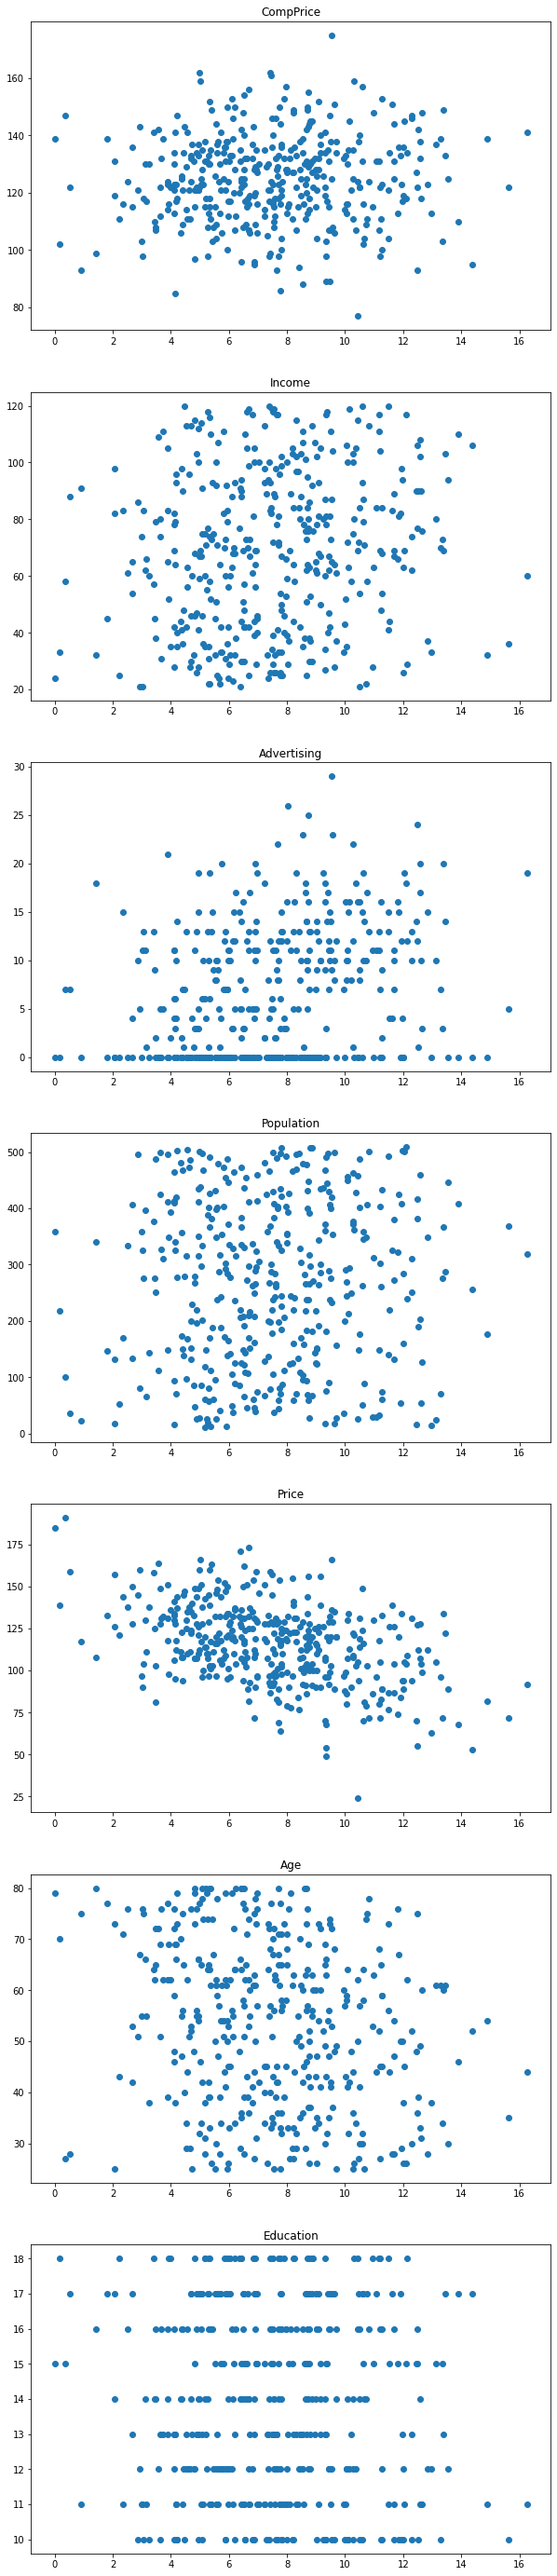

In [ ]:
fig, axs = plt.subplots(len(cnames), sharex=False, sharey=False, figsize = (10, 50))
for i in range(0, len(cnames)):
  axs[i].scatter(df_carseats['Sales'], df_carseats[cnames[i]])
  axs[i].set_title(cnames[i])
plt.show()

Sales와 나머지 수치형 변수들의 상관성을 살펴보았을 때, Price와 음의 선형 상관관계가 있는 것을 제외하고는 '선형 상관관계'라고 말할 수 있을만한 변수가 보이지 않는다. Age 변수의 경우 양 극단값들이 Sales 변수의 극단값 부근에 몰려있기 때문에 아마도 pearson 상관계수를 구했을 때 상관계수가 다소 높거나 선형관계가 존재한다고 나올 수도 있다. 그러나 기본적으로 눈에 보이는 선형성이 없기 때문에 불완전한 피어슨 상관계수의 결과를 믿어서는 안 될 것이다. 이처럼 그래프로 1차적인 선형관계를 파악한 뒤 피어슨 상관분석을 수행해보았다.

In [ ]:
from scipy.stats import pearsonr

In [ ]:
for i in cnames:
  print('Sales와 %s의 피어슨 상관분석 결과'%i)
  r,pvalue = pearsonr(df_carseats['Sales'], df_carseats[i])
  print("상관계수:", r)
  print("p-value:", pvalue)
  print("=======================\n")

Sales와 CompPrice의 피어슨 상관분석 결과
상관계수: 0.06407872955062152
p-value: 0.2009398289418295

Sales와 Income의 피어슨 상관분석 결과
상관계수: 0.15195097946754427
p-value: 0.0023096704539517627

Sales와 Advertising의 피어슨 상관분석 결과
상관계수: 0.2695067813769019
p-value: 4.377677110302732e-08

Sales와 Population의 피어슨 상관분석 결과
상관계수: 0.050470984472039196
p-value: 0.31398160931903

Sales와 Price의 피어슨 상관분석 결과
상관계수: -0.4449507278465725
p-value: 7.61818701191294e-21

Sales와 Age의 피어슨 상관분석 결과
상관계수: -0.23181543960457654
p-value: 2.7889498393711916e-06

Sales와 Education의 피어슨 상관분석 결과
상관계수: -0.05195524196813419
p-value: 0.2999441527131608



피어슨 상관분석 결과 유의수준 0.01에서 선형 상관관계가 있다고 나온 변수들은 'Advertising', 'Population', 'Price', 'Age'이다. 여기서 음의 상관관계를 보여주는 변수는 'Price'와 'Age''이다. 그러나 산점도에서 Price를 제외한 나머지 변수는 Sales와 선형성을 만족하지 않는 것을 확인했으므로, 피어슨 상관분석의 결과가 유의미하다고 말할 수 없다. 
피어슨 상관분석의 p값은 데이터의 수가 많아질수록 상관계수와 무관하게 줄어드는 경향이 있다. 물론 주어진 데이터의 표본은 400으로 데이터의 수가 p값을 현저하게 줄일만큼 의미있다고 하기는 어렵지만, 이 경우 극단값의 영향으로 상관계수와 p값이 왜곡되었다고 말할 수 있을 것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

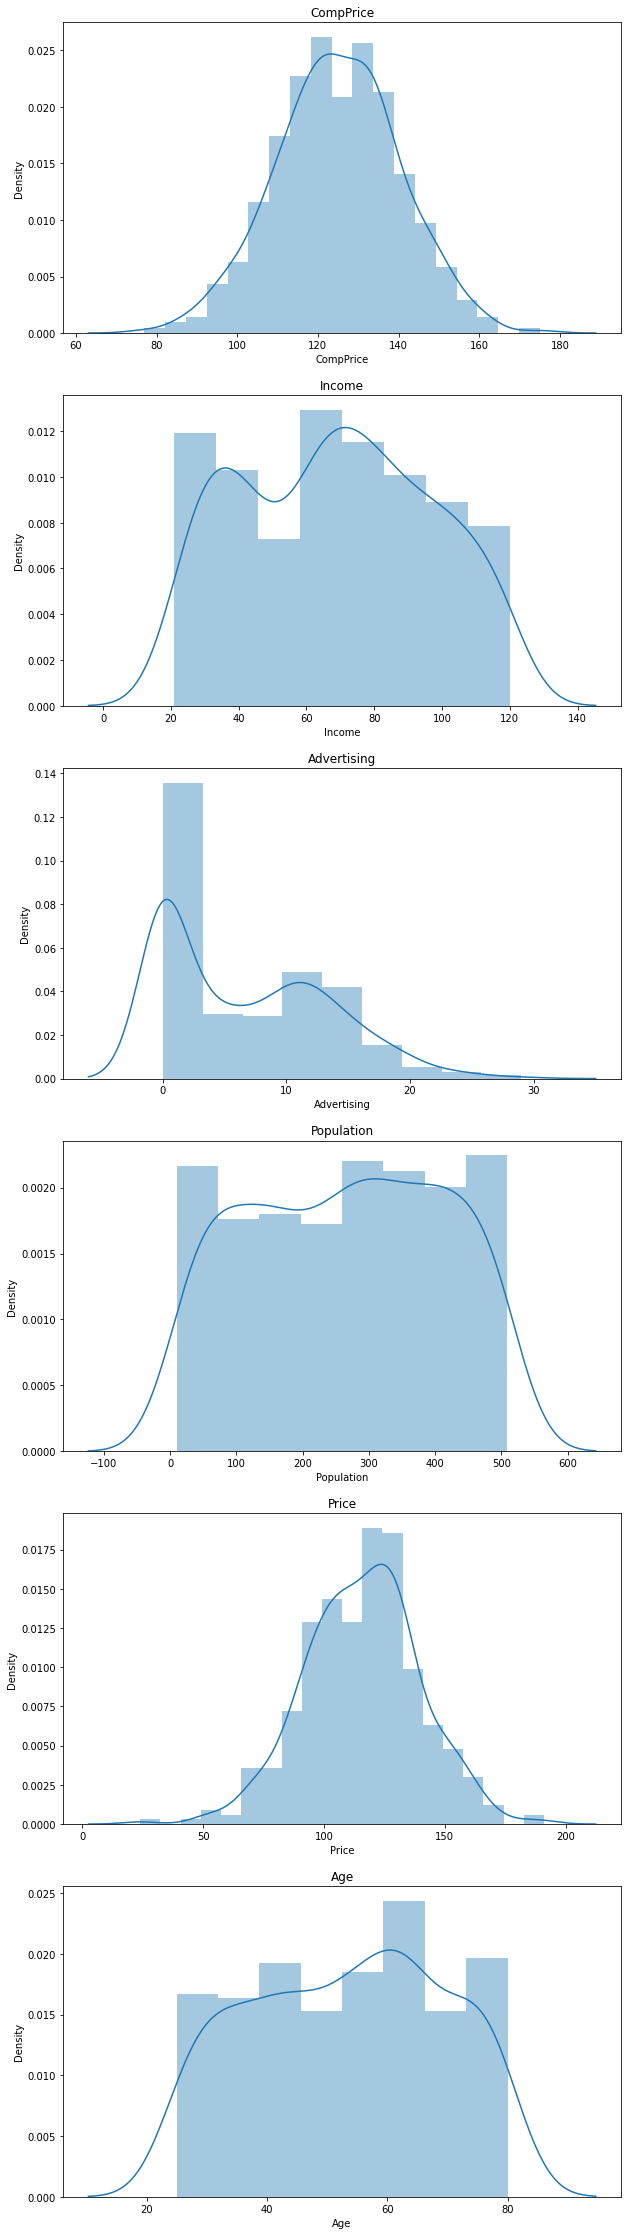

In [ ]:
## 수치형 데이터를 정규분포에 가깝게 만들어 (이상치를 제거해) 피어슨 상관관계를 다시 파악
fig,axs = plt.subplots(6, figsize = (10, 40))
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
for i in range(0,6):
  sns.distplot(ax = axs[i], a = df_carseats[cnames[i]])
  axs[i].set_title(cnames[i])
plt.show()

실제로 Sales(이미 1번에서 정규분포를 따르는 것으로 확인됨) 변수를 제외한 다른 변수들을 보면 CompPrice와 Price를 제외한 나머지 변수들은 정규분포를 따른다고 말하기 어렵다. 그러므로 피어슨 상관분석이 아닌 다른 상관계수를 확인하는 것이 좋다. 
결론적으로 선형관계가 존재한다고 말할 수 있는 변수는 'Price'하나 뿐이다.

In [ ]:
df_carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## 3. 종속변수를 Sales, 독립변수를 CompPrice, Income, Advertising, Population, Price, Age, Education으로 설정하고, 후진제거법을 활용해 회귀분석을 실시하고, 추정된 회귀식을 작성하시오.

In [21]:
### 후진제거법은 p-value가 가장 큰 것부터 없애나간다
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

lr = LinearRegression()
## n_features_to_select : 최종적으로 몇개의 변수를 골라낼 것인가, step = 한 번에 몇 개의 변수를 골라낼 것인가

## 1개씩 없애가면서 살펴보는거얏
for i in range(len(cnames),0,-1):
  rfe = RFE(lr, n_features_to_select = i, step = 1)
  model = rfe.fit(df_carseats[cnames], df_carseats['Sales'])
  filtered_list = [i for (i, v) in zip(cnames, model.support_) if v]
  ## R2 확인용
  X = df_carseats[filtered_list]
  X = sm.add_constant(X)
  y = df_carseats['Sales']
  model = sm.OLS(y,X)
  results = model.fit()
  print("선택된 변수:", filtered_list)
  print(results.summary())
  print("=====================\n")

선택된 변수: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     66.18
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           1.41e-62
Time:                        02:41:28   Log-Likelihood:                -826.32
No. Observations:                 400   AIC:                             1669.
Df Residuals:                     392   BIC:                             1701.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
## 최종적인 RFE model의 ranking_을 확인하면 각 변수의 p-value 기반 중요도를 알 수 있음 (1 -> p-value 가장 작음)

위의 결과를 보면 최종적으로 뽑힌 Advertising이라는 하나의 변수는 10퍼센트도 안 되는 설명력을 가진 것으로 보인다. Price 변수가 있는 변수 3개 모델에서 2개 모델로 넘어갈 때, 45퍼센트 설명력에서 10퍼센트 미만 설명력으로 떨어진다. 이 말은 Price 변수가 반드시 모델에 필요하다는건데, 이렇게 변수선택이 잘못된 이유는 여러가지로 추측해볼 수 있다. 
1. 변수마다 scale을 고려하지 않고 그대로 모델에 넣어서 scale이 큰 변수의 coefficient가 0에 가깝게 산정되었다.
2. 독립변수가 회귀식의 기본가정을 만족하지 않는다 (서로 선형적인 상관관계가 없다)
여기서 2번은 모델을 이미 지정했기 때문에 바꿀 수 없는 문제이나, 1번의 경우 다시 시도해봄직하다고 생각하여 normalization를 진행 후 다시 backward selection을 진행하겠다. 

In [25]:
from sklearn.preprocessing import StandardScaler
df_carseats[cnames] = StandardScaler().fit_transform(df_carseats[cnames])

In [26]:
for i in range(len(cnames),0,-1):
  rfe = RFE(lr, n_features_to_select = i, step = 1)
  model = rfe.fit(df_carseats[cnames], df_carseats['Sales'])
  filtered_list = [i for (i, v) in zip(cnames, model.support_) if v]
  ## R2 확인용
  X = df_carseats[filtered_list]
  X = sm.add_constant(X)
  y = df_carseats['Sales']
  model = sm.OLS(y,X)
  results = model.fit()
  print("선택된 변수:", filtered_list)
  print(results.summary())
  print("=====================\n")

선택된 변수: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     66.18
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           1.41e-62
Time:                        04:09:03   Log-Likelihood:                -826.32
No. Observations:                 400   AIC:                             1669.
Df Residuals:                     392   BIC:                             1701.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

설명력에 큰 변화는 없지만 최종적으로 선택된 변수 하나의 R2가 20퍼센트 정도로 normalize 이전 모델보다 납득이 갈 수 있게 됨

## 4. 3의 결과를 해석하시오

R2와 변수의 수를 절충하여 판단했을 때, 변수의 전체 분산에 대한 설명력이 50%를 넘기는 변수 4개 모델이 적합할 것이라고 판단함.
모델의 설명력을 위해서 다음 회귀 모델을 사용할 수 있도록 한다.
Y = 1.4131 * CompPrice + 0.888 * Advertising + -2.1959 * Price + -0.7325 * Age + 7.4963
여기서 가장 영향력이 큰 변수는 Price로, Price의 normalize된 단위가 1씩 오를 때마다 -2.1959씩 sales인 y값은 감소한다. 

# 정형 데이터마이닝 (data: BlackFriday)

### 1. "BlackFriday"데이터에서 Product_Categoryu_2, Product_Category_3의 NA 값에 0값으로 대체하고 Product_category_1,2,3 변수의 값을 다 더한 Product_all 변수를 생성하여 추가하라. 그리고 User_ID를 character 변수로, Occupation, Martial_Status, Product_Category_1, Product_Category_2, Product_Category_3 변수를 범주형 변수로 변환하시오. 마지막으로 범주형 변수인 Gender, Age, City_Category, Stay_In_Current_City_Years를 더미변수로 변환해서 BlackFriday 데이터에 추가하시오

In [50]:
df_bf = pd.read_csv("/content/drive/MyDrive/data/adp/BlackFriday.csv")
df_bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [51]:
## Product Category 변수 값을 전부 더한 Product_all 변수를 생성
df_bf[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']] = df_bf[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].fillna(0)

In [53]:
## Product_all 변수 생성
df_bf['Product_all'] = df_bf['Product_Category_1'] + df_bf['Product_Category_2'] + df_bf['Product_Category_3']

In [54]:
df_bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,21.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,12.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,26.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,8.0


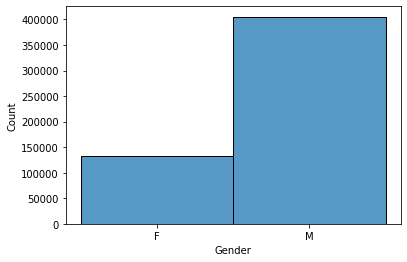

In [56]:
## 범주형 변수 Gender, Age, City_Category, Stay_In_Current_City_Years를 더미변수로 변환해서 BlackFriday 데이터에 추가

#대체 범주가 몇개일까... 그래프로 그려서 일단 확인해보자
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_bf['Gender'])
plt.show()

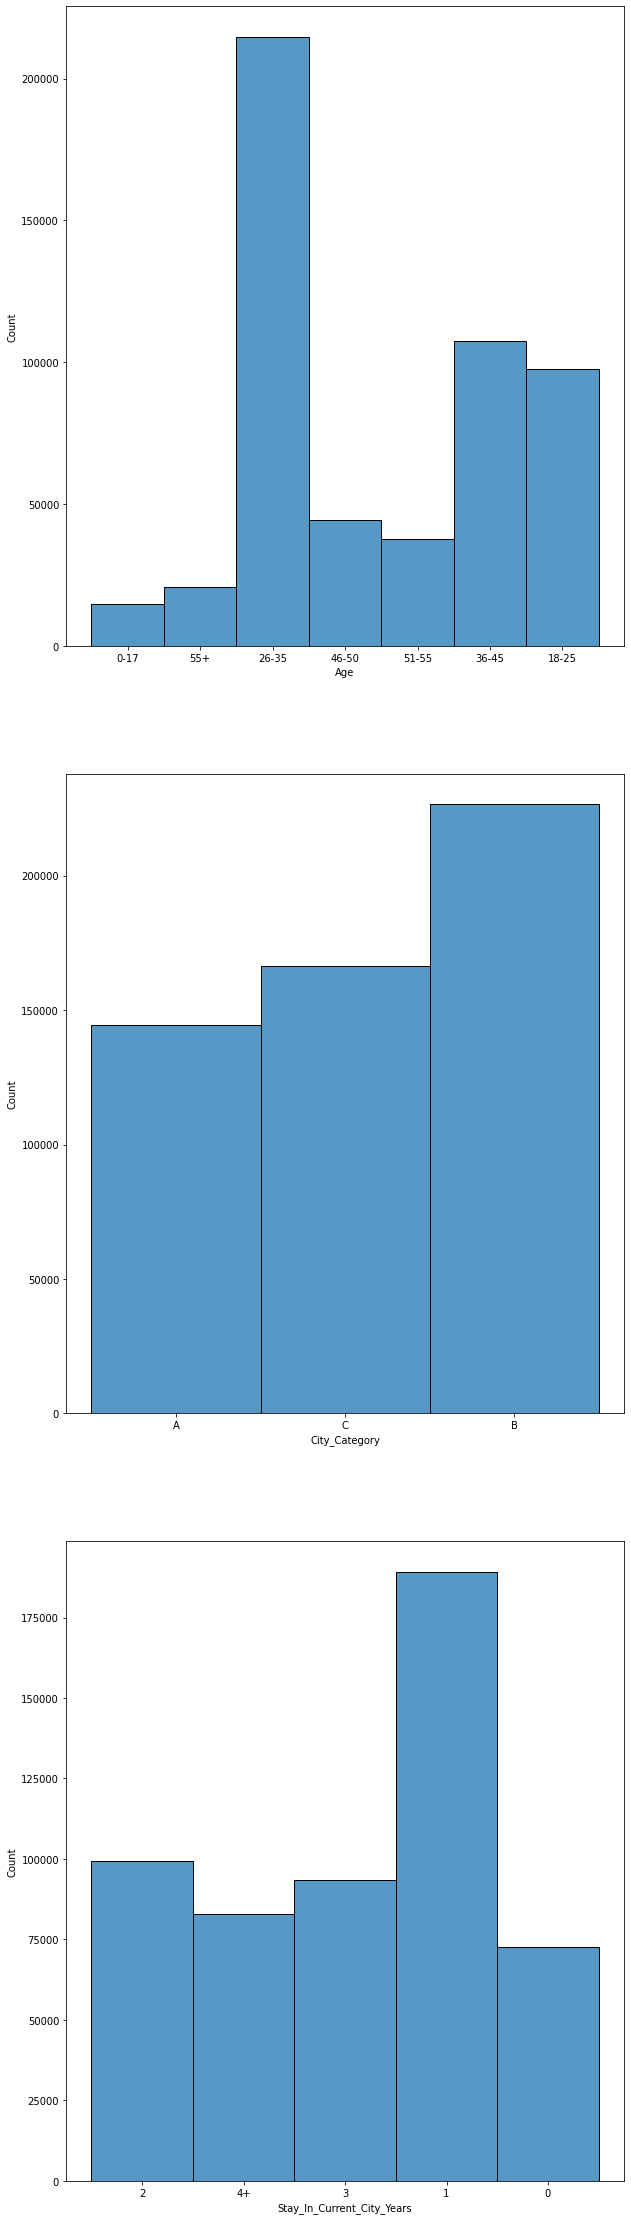

In [58]:
fig,axs = plt.subplots(3, figsize = (10, 40))
sns.histplot(ax= axs[0], data = df_bf['Age'])
sns.histplot(ax= axs[1], data = df_bf['City_Category'])
sns.histplot(ax= axs[2], data = df_bf['Stay_In_Current_City_Years'])
plt.show()

In [61]:
bf_dummies = pd.get_dummies(df_bf[['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']], drop_first=True)
df_bf = pd.concat([df_bf, bf_dummies], axis = 1)
df_bf.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Product_all',
       'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+'],
      dtype='object')

### 2. BlackFriday_1 데이터에서 User_ID, Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years, Product_all 변수를 제외한 나머지 변수들을 활용하여 kmeans 군집분석을 수행하고 해석하시오. (범주형 변수는 수치형 변수로 변환하여 분석에 활용하시오.)  그리고 최적의 군집 개수를 찾아서 만일 군집 개수가 이전 결과와 다르면 분석을 다시 수행하여 해석하시오

In [62]:
df_bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        537577 non-null  int64  
 1   Product_ID                     537577 non-null  object 
 2   Gender                         537577 non-null  object 
 3   Age                            537577 non-null  object 
 4   Occupation                     537577 non-null  int64  
 5   City_Category                  537577 non-null  object 
 6   Stay_In_Current_City_Years     537577 non-null  object 
 7   Marital_Status                 537577 non-null  int64  
 8   Product_Category_1             537577 non-null  int64  
 9   Product_Category_2             537577 non-null  float64
 10  Product_Category_3             537577 non-null  float64
 11  Purchase                       537577 non-null  int64  
 12  Product_all                   

In [63]:
## cluster용으로 따로 데이터를 빼놓고 라벨을 원 데이터에 붙여서 gender, age 등의 특성을 파악할 예정
df_bfclust = df_bf.copy(deep = True).drop(['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Product_all'], axis = 1)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  kmeans.fit(df_bfclust)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


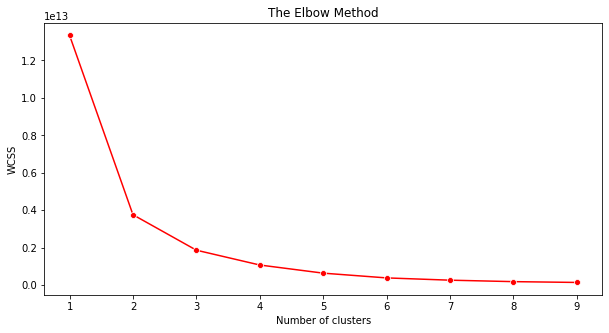

In [64]:
## elbow method를 통해 최적의 cluster 개수를 찾아보자

plt.figure(figsize = (10,5))
sns.lineplot(range(1,10), wcss, marker = 'o', color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

elbow method를 활용하면 Within Cluster Sum of Squares가 많이 감소하지 않는 Cluster 개수는 3개 이상부터로 보인다. 따라서 군집 개수를 3개로 라벨링

In [67]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_bfclust)

###3. 최적의 군집 개수를 찾아 재수행한 군집분석의 결과로 분류된 군집번호를 원본 데이터인 BlackFriday데이터의 각 행에 맞게 labelling하여 clust라는 변수로 저장하고 csv 파일로 출력하시오. 마지막으로 clust별 Gender, Age, Purchase으로 특성을 파악하시오.

In [68]:
df_bf['kmeans'] = y_kmeans

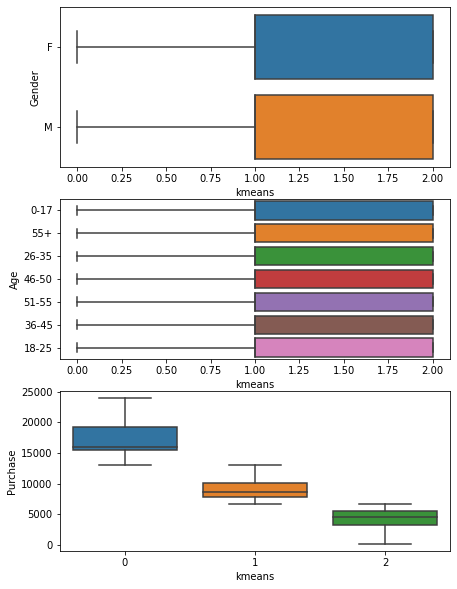

In [69]:
## boxplot을 통해 cluster별 특성을 Gender, Age, Purchase의 특성을 파악

fig,axs = plt.subplots(3, figsize = (7,10))
sns.boxplot(ax = axs[0], y = df_bf['Gender'], x = df_bf['kmeans'])
sns.boxplot(ax = axs[1], y = df_bf['Age'], x = df_bf['kmeans'])
sns.boxplot(ax = axs[2], y = df_bf['Purchase'], x = df_bf['kmeans'])
plt.show()